In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

In [2]:
household_daily = pd.read_csv("../Data/daily_households_merge.csv")
household = pd.read_csv("../Data/daily_group_households_merge.csv")
acorn_demog = pd.read_csv("../Data/households_acorn_merge.csv")

# Looking at energy consumption by ACORN group

In [3]:
household.head()

,LCLid,stdorToU,Acorn,Acorn_grouped,file,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC005492,ToU,ACORN-,ACORN-,block_0,0.136890,0.156538,0.473731,47.796029,0.081638,7.489430,0.081805
1,MAC001074,ToU,ACORN-,ACORN-,block_0,0.281463,0.482180,2.267529,47.484581,0.493060,23.021159,0.090079
2,MAC000002,Std,ACORN-A,Affluent,block_0,0.188966,0.254590,1.086095,47.801980,0.208284,12.070638,0.080400
3,MAC003613,Std,ACORN-A,Affluent,block_0,0.556885,0.689801,2.126520,47.861660,0.456567,33.051958,0.196022
4,MAC003597,Std,ACORN-A,Affluent,block_0,0.474339,0.599455,1.657329,47.759369,0.339434,28.677199,0.291314


[Text(0, 0.5, 'Avg. daily energy consumption'), Text(0.5, 0, 'ACORN group')]

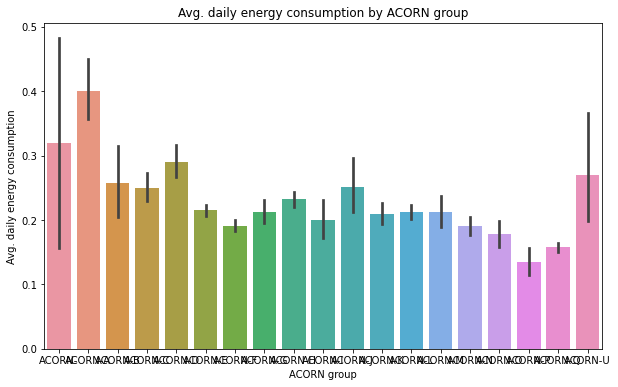

In [4]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=household, x="Acorn", y="energy_mean", ax=ax);
ax.set_title("Avg. daily energy consumption by ACORN group")
ax.set(xlabel="ACORN group", ylabel = "Avg. daily energy consumption")

# Looking at energy consumption by household

In [5]:
household_daily.head()

,LCLid,stdorToU,Acorn,Acorn_grouped,file,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC005492,ToU,ACORN-,ACORN-,block_0,2012-04-17,0.1580,0.153742,0.348,31,0.080700,4.766,0.044
1,MAC005492,ToU,ACORN-,ACORN-,block_0,2012-04-18,0.1145,0.135875,0.368,48,0.084776,6.522,0.045
2,MAC005492,ToU,ACORN-,ACORN-,block_0,2012-04-19,0.1615,0.158667,0.526,48,0.095721,7.616,0.047
3,MAC005492,ToU,ACORN-,ACORN-,block_0,2012-04-20,0.1000,0.136438,0.410,48,0.092637,6.549,0.044
4,MAC005492,ToU,ACORN-,ACORN-,block_0,2012-04-21,0.1130,0.130833,0.316,48,0.070832,6.280,0.046


# Looking at energy consumption/household by demographics

In [6]:
acorn_demog.head()

,Unnamed: 0,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,energy_median,0.321965,0.194364,0.185871,0.220806,0.157029,0.148333,0.154383,0.176333,0.147884,0.179349,0.162391,0.158933,0.163078,0.144710,0.131435,0.084477,0.119788
1,energy_mean,0.400508,0.257280,0.250123,0.290494,0.214697,0.191340,0.212270,0.231930,0.199217,0.251924,0.209176,0.212515,0.212296,0.190770,0.178575,0.134468,0.157391
2,energy_max,1.253652,0.914857,0.968567,1.012736,0.853340,0.743463,0.874314,0.881041,0.811387,1.081440,0.824010,0.849141,0.868039,0.780887,0.776283,0.730513,0.666115
3,energy_count,47.757006,47.807940,47.650269,47.806622,47.808111,47.784121,47.824558,47.809336,47.772464,47.763889,47.762899,47.816251,47.803685,47.774356,47.676917,47.783736,47.775767
4,energy_std,0.263732,0.190619,0.199943,0.217936,0.180874,0.149893,0.179882,0.181567,0.164555,0.227259,0.167704,0.172906,0.173291,0.156882,0.154680,0.153736,0.132703


In [7]:
acorn_demog = acorn_demog.rename(columns={'Unnamed: 0': 'category'})
#acorn_demog = acorn_demog.set_index('Unnamed: 0')

In [8]:
acorn_demog.head()

,category,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,energy_median,0.321965,0.194364,0.185871,0.220806,0.157029,0.148333,0.154383,0.176333,0.147884,0.179349,0.162391,0.158933,0.163078,0.144710,0.131435,0.084477,0.119788
1,energy_mean,0.400508,0.257280,0.250123,0.290494,0.214697,0.191340,0.212270,0.231930,0.199217,0.251924,0.209176,0.212515,0.212296,0.190770,0.178575,0.134468,0.157391
2,energy_max,1.253652,0.914857,0.968567,1.012736,0.853340,0.743463,0.874314,0.881041,0.811387,1.081440,0.824010,0.849141,0.868039,0.780887,0.776283,0.730513,0.666115
3,energy_count,47.757006,47.807940,47.650269,47.806622,47.808111,47.784121,47.824558,47.809336,47.772464,47.763889,47.762899,47.816251,47.803685,47.774356,47.676917,47.783736,47.775767
4,energy_std,0.263732,0.190619,0.199943,0.217936,0.180874,0.149893,0.179882,0.181567,0.164555,0.227259,0.167704,0.172906,0.173291,0.156882,0.154680,0.153736,0.132703


In [9]:
acorn_age = acorn_demog[acorn_demog['category'].str.match('energy_sum|POPULATION Age')].reset_index(drop=True)
acorn_age

,category,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,energy_sum,19.136447,12.308166,11.944181,13.891547,10.266307,9.147653,10.152736,11.095026,9.519876,12.013334,10.00043,10.165978,10.155002,9.123604,8.507536,6.407015,7.52173
1,POPULATION Age Age 0-4,77.000000,83.000000,72.000000,100.000000,120.000000,77.000000,97.000000,97.000000,63.000000,119.000000,67.00000,114.000000,113.000000,89.000000,123.000000,138.000000,133.00000
2,POPULATION Age Age 5-17,117.000000,109.000000,87.000000,69.000000,94.000000,95.000000,102.000000,106.000000,67.000000,95.000000,64.00000,108.000000,116.000000,86.000000,89.000000,136.000000,106.00000
3,POPULATION Age Age 18-24,64.000000,73.000000,67.000000,107.000000,100.000000,71.000000,83.000000,89.000000,62.000000,104.000000,459.00000,97.000000,96.000000,86.000000,117.000000,109.000000,110.00000
4,POPULATION Age Age 25-34,52.000000,63.000000,62.000000,197.000000,151.000000,66.000000,90.000000,88.000000,63.000000,132.000000,145.00000,109.000000,96.000000,90.000000,140.000000,120.000000,120.00000
5,POPULATION Age Age 35-49,102.000000,105.000000,91.000000,124.000000,118.000000,93.000000,102.000000,103.000000,76.000000,111.000000,67.00000,99.000000,98.000000,90.000000,102.000000,103.000000,100.00000
6,POPULATION Age Age 50-64,124.000000,121.000000,120.000000,72.000000,82.000000,126.000000,109.000000,107.000000,112.000000,90.000000,41.00000,95.000000,96.000000,103.000000,89.000000,78.000000,89.00000
7,POPULATION Age Aged 65-74,125.000000,120.000000,152.000000,55.000000,61.000000,144.000000,108.000000,104.000000,182.000000,72.000000,29.00000,91.000000,93.000000,125.000000,73.000000,59.000000,76.00000
8,POPULATION Age Aged 75 plus,112.000000,103.000000,157.000000,49.000000,57.000000,117.000000,98.000000,96.000000,220.000000,66.000000,32.00000,87.000000,96.000000,152.000000,72.000000,56.000000,76.00000


In [10]:
acorn_house = acorn_demog[acorn_demog['category'].str.contains('energy_sum|House Type|House Tenure|House Size')].reset_index(drop=True)
acorn_house

,category,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,energy_sum,19.136447,12.308166,11.944181,13.891547,10.266307,9.147653,10.152736,11.095026,9.519876,12.013334,10.00043,10.165978,10.155002,9.123604,8.507536,6.407015,7.52173
1,HOUSING House Type Bungalow,118.000000,100.000000,198.000000,51.000000,51.000000,167.000000,94.000000,74.000000,410.000000,55.000000,61.00000,64.000000,64.000000,64.000000,45.000000,50.000000,50.00000
2,HOUSING House Type Detached house,431.000000,419.000000,229.000000,46.000000,98.000000,287.000000,203.000000,59.000000,138.000000,61.000000,38.00000,32.000000,25.000000,24.000000,20.000000,19.000000,13.00000
3,HOUSING House Type Flat or maisonette,36.000000,25.000000,47.000000,274.000000,196.000000,17.000000,22.000000,17.000000,54.000000,30.000000,299.00000,49.000000,29.000000,159.000000,160.000000,142.000000,277.00000
4,HOUSING House Type Semi-detached house,56.000000,70.000000,139.000000,36.000000,66.000000,119.000000,96.000000,192.000000,172.000000,102.000000,33.00000,72.000000,139.000000,125.000000,39.000000,92.000000,52.00000
5,HOUSING House Type Terraced house,23.000000,20.000000,25.000000,86.000000,77.000000,38.000000,103.000000,71.000000,31.000000,163.000000,77.00000,199.000000,140.000000,72.000000,169.000000,123.000000,83.00000
6,HOUSING House Tenure Owner occupied,152.000000,155.000000,150.000000,85.000000,96.000000,139.000000,138.000000,143.000000,147.000000,116.000000,51.00000,116.000000,87.000000,55.000000,81.000000,53.000000,35.00000
7,HOUSING House Tenure Owned outright,178.000000,160.000000,182.000000,72.000000,71.000000,163.000000,140.000000,140.000000,204.000000,93.000000,40.00000,116.000000,78.000000,61.000000,76.000000,48.000000,31.00000
8,HOUSING House Tenure Mortgaged,127.000000,151.000000,120.000000,96.000000,121.000000,117.000000,138.000000,148.000000,90.000000,140.000000,57.00000,117.000000,96.000000,49.000000,86.000000,57.000000,38.00000
9,HOUSING House Tenure Privately rented,58.000000,53.000000,62.000000,228.000000,196.000000,75.000000,89.000000,72.000000,55.000000,150.000000,296.00000,127.000000,63.000000,44.000000,218.000000,84.000000,48.00000


In [11]:
acorn_family = acorn_demog[acorn_demog['category'].str.contains('energy_sum|FAMILY Structure|FAMILY Children')].reset_index(drop=True)
acorn_family

,category,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,energy_sum,19.136447,12.308166,11.944181,13.891547,10.266307,9.147653,10.152736,11.095026,9.519876,12.013334,10.00043,10.165978,10.155002,9.123604,8.507536,6.407015,7.52173
1,FAMILY Structure Couple family no children,112.000000,124.000000,113.000000,115.000000,118.000000,132.000000,108.000000,104.000000,89.000000,117.000000,83.00000,90.000000,87.000000,69.000000,90.000000,60.000000,62.00000
2,FAMILY Structure Couple family with dependent ...,146.000000,140.000000,101.000000,70.000000,106.000000,108.000000,115.000000,116.000000,61.000000,104.000000,52.00000,104.000000,98.000000,61.000000,75.000000,85.000000,65.00000
3,FAMILY Structure Lone parent family with depen...,30.000000,48.000000,52.000000,59.000000,85.000000,58.000000,75.000000,80.000000,48.000000,103.000000,68.00000,106.000000,146.000000,124.000000,128.000000,223.000000,218.00000
4,FAMILY Structure All pensioner households,119.000000,105.000000,159.000000,55.000000,51.000000,133.000000,97.000000,101.000000,245.000000,63.000000,37.00000,88.000000,92.000000,186.000000,70.000000,56.000000,70.00000
5,FAMILY Structure All student households,16.000000,23.000000,15.000000,224.000000,141.000000,5.000000,44.000000,30.000000,10.000000,117.000000,1821.00000,60.000000,29.000000,17.000000,109.000000,87.000000,52.00000
6,FAMILY Structure One person household (non-pen...,57.000000,59.000000,64.000000,174.000000,139.000000,67.000000,78.000000,67.000000,54.000000,127.000000,198.00000,101.000000,90.000000,93.000000,176.000000,114.000000,174.00000
7,FAMILY Structure Other household structure,86.000000,87.000000,75.000000,112.000000,98.000000,71.000000,110.000000,118.000000,60.000000,93.000000,96.00000,117.000000,118.000000,80.000000,90.000000,147.000000,98.00000
8,FAMILY Children in household Children at home : 0,106.000000,101.000000,111.000000,108.000000,97.000000,109.000000,101.000000,98.000000,122.000000,100.000000,117.00000,98.000000,93.000000,114.000000,100.000000,81.000000,97.00000
9,FAMILY Children in household Children at home : 1,84.000000,88.000000,76.000000,90.000000,120.000000,79.000000,98.000000,101.000000,62.000000,107.000000,78.00000,108.000000,105.000000,76.000000,116.000000,122.000000,113.00000


In [12]:
acorn_finance = acorn_demog[acorn_demog['category'].str.contains('energy_sum|Annual Income')].reset_index(drop=True)
acorn_finance

,category,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,energy_sum,19.136447,12.308166,11.944181,13.891547,10.266307,9.147653,10.152736,11.095026,9.519876,12.013334,10.00043,10.165978,10.155002,9.123604,8.507536,6.407015,7.52173
1,"FINANCE Household Annual Income £0-£20,000",19.000000,30.000000,65.000000,43.000000,55.000000,78.000000,60.000000,73.000000,131.000000,70.000000,115.00000,111.000000,129.000000,219.000000,134.000000,154.000000,218.00000
2,"FINANCE Household Annual Income £20,000-£40,000",49.000000,69.000000,101.000000,79.000000,95.000000,111.000000,101.000000,109.000000,114.000000,108.000000,118.00000,120.000000,117.000000,76.000000,119.000000,112.000000,82.00000
3,"FINANCE Household Annual Income £40,000-£60,000",112.000000,127.000000,123.000000,125.000000,131.000000,119.000000,130.000000,124.000000,80.000000,128.000000,94.00000,97.000000,84.000000,33.000000,79.000000,64.000000,28.00000
4,"FINANCE Household Annual Income £60,000-£80,000",200.000000,189.000000,134.000000,170.000000,152.000000,113.000000,142.000000,121.000000,58.000000,125.000000,66.00000,69.000000,55.000000,14.000000,47.000000,35.000000,10.00000
5,"FINANCE Household Annual Income £80,000-£100,000",304.000000,247.000000,138.000000,209.000000,160.000000,100.000000,140.000000,108.000000,42.000000,110.000000,44.00000,45.000000,34.000000,6.000000,27.000000,20.000000,4.00000
6,"FINANCE Household Annual Income £100,000+",511.000000,332.000000,131.000000,267.000000,152.000000,74.000000,119.000000,80.000000,24.000000,78.000000,24.00000,22.000000,16.000000,2.000000,11.000000,9.000000,1.00000
7,FINANCE Household Annual Income Average Househ...,195.000000,163.000000,117.000000,148.000000,126.000000,103.000000,118.000000,106.000000,75.000000,107.000000,80.00000,81.000000,74.000000,46.000000,71.000000,65.000000,46.00000


In [13]:
overall = acorn_demog[acorn_demog['category'].str.contains('energy_sum|POPULATION Age|House Type|House Tenure|House Size|FAMILY Structure|FAMILY Children|Annuel Income')].reset_index(drop=True)
overall

,category,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,energy_sum,19.136447,12.308166,11.944181,13.891547,10.266307,9.147653,10.152736,11.095026,9.519876,12.013334,10.00043,10.165978,10.155002,9.123604,8.507536,6.407015,7.52173
1,POPULATION Age Age 0-4,77.000000,83.000000,72.000000,100.000000,120.000000,77.000000,97.000000,97.000000,63.000000,119.000000,67.00000,114.000000,113.000000,89.000000,123.000000,138.000000,133.00000
2,POPULATION Age Age 5-17,117.000000,109.000000,87.000000,69.000000,94.000000,95.000000,102.000000,106.000000,67.000000,95.000000,64.00000,108.000000,116.000000,86.000000,89.000000,136.000000,106.00000
3,POPULATION Age Age 18-24,64.000000,73.000000,67.000000,107.000000,100.000000,71.000000,83.000000,89.000000,62.000000,104.000000,459.00000,97.000000,96.000000,86.000000,117.000000,109.000000,110.00000
4,POPULATION Age Age 25-34,52.000000,63.000000,62.000000,197.000000,151.000000,66.000000,90.000000,88.000000,63.000000,132.000000,145.00000,109.000000,96.000000,90.000000,140.000000,120.000000,120.00000
5,POPULATION Age Age 35-49,102.000000,105.000000,91.000000,124.000000,118.000000,93.000000,102.000000,103.000000,76.000000,111.000000,67.00000,99.000000,98.000000,90.000000,102.000000,103.000000,100.00000
6,POPULATION Age Age 50-64,124.000000,121.000000,120.000000,72.000000,82.000000,126.000000,109.000000,107.000000,112.000000,90.000000,41.00000,95.000000,96.000000,103.000000,89.000000,78.000000,89.00000
7,POPULATION Age Aged 65-74,125.000000,120.000000,152.000000,55.000000,61.000000,144.000000,108.000000,104.000000,182.000000,72.000000,29.00000,91.000000,93.000000,125.000000,73.000000,59.000000,76.00000
8,POPULATION Age Aged 75 plus,112.000000,103.000000,157.000000,49.000000,57.000000,117.000000,98.000000,96.000000,220.000000,66.000000,32.00000,87.000000,96.000000,152.000000,72.000000,56.000000,76.00000
9,HOUSING House Type Bungalow,118.000000,100.000000,198.000000,51.000000,51.000000,167.000000,94.000000,74.000000,410.000000,55.000000,61.00000,64.000000,64.000000,64.000000,45.000000,50.000000,50.00000


In [14]:
overall = overall.set_index('category')
overall

,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
category,,,,,,,,,,,,,,,,,
energy_sum,19.136447,12.308166,11.944181,13.891547,10.266307,9.147653,10.152736,11.095026,9.519876,12.013334,10.00043,10.165978,10.155002,9.123604,8.507536,6.407015,7.52173
POPULATION Age Age 0-4,77.000000,83.000000,72.000000,100.000000,120.000000,77.000000,97.000000,97.000000,63.000000,119.000000,67.00000,114.000000,113.000000,89.000000,123.000000,138.000000,133.00000
POPULATION Age Age 5-17,117.000000,109.000000,87.000000,69.000000,94.000000,95.000000,102.000000,106.000000,67.000000,95.000000,64.00000,108.000000,116.000000,86.000000,89.000000,136.000000,106.00000
POPULATION Age Age 18-24,64.000000,73.000000,67.000000,107.000000,100.000000,71.000000,83.000000,89.000000,62.000000,104.000000,459.00000,97.000000,96.000000,86.000000,117.000000,109.000000,110.00000
POPULATION Age Age 25-34,52.000000,63.000000,62.000000,197.000000,151.000000,66.000000,90.000000,88.000000,63.000000,132.000000,145.00000,109.000000,96.000000,90.000000,140.000000,120.000000,120.00000
POPULATION Age Age 35-49,102.000000,105.000000,91.000000,124.000000,118.000000,93.000000,102.000000,103.000000,76.000000,111.000000,67.00000,99.000000,98.000000,90.000000,102.000000,103.000000,100.00000
POPULATION Age Age 50-64,124.000000,121.000000,120.000000,72.000000,82.000000,126.000000,109.000000,107.000000,112.000000,90.000000,41.00000,95.000000,96.000000,103.000000,89.000000,78.000000,89.00000
POPULATION Age Aged 65-74,125.000000,120.000000,152.000000,55.000000,61.000000,144.000000,108.000000,104.000000,182.000000,72.000000,29.00000,91.000000,93.000000,125.000000,73.000000,59.000000,76.00000
POPULATION Age Aged 75 plus,112.000000,103.000000,157.000000,49.000000,57.000000,117.000000,98.000000,96.000000,220.000000,66.000000,32.00000,87.000000,96.000000,152.000000,72.000000,56.000000,76.00000


In [15]:
overall = overall.transpose()
overall

category,energy_sum,POPULATION Age Age 0-4,POPULATION Age Age 5-17,POPULATION Age Age 18-24,POPULATION Age Age 25-34,POPULATION Age Age 35-49,POPULATION Age Age 50-64,POPULATION Age Aged 65-74,POPULATION Age Aged 75 plus,HOUSING House Type Bungalow,...,FAMILY Structure Couple family with dependent children,FAMILY Structure Lone parent family with dependent children,FAMILY Structure All pensioner households,FAMILY Structure All student households,FAMILY Structure One person household (non-pensioner),FAMILY Structure Other household structure,FAMILY Children in household Children at home : 0,FAMILY Children in household Children at home : 1,FAMILY Children in household Children at home : 2,FAMILY Children in household Children at home : 3+
ACORN-A,19.136447,77.0,117.0,64.0,52.0,102.0,124.0,125.0,112.0,118.0,...,146.0,30.0,119.0,16.0,57.0,86.0,106.0,84.0,103.0,68.0
ACORN-B,12.308166,83.0,109.0,73.0,63.0,105.0,121.0,120.0,103.0,100.0,...,140.0,48.0,105.0,23.0,59.0,87.0,101.0,88.0,118.0,76.0
ACORN-C,11.944181,72.0,87.0,67.0,62.0,91.0,120.0,152.0,157.0,198.0,...,101.0,52.0,159.0,15.0,64.0,75.0,111.0,76.0,89.0,55.0
ACORN-D,13.891547,100.0,69.0,107.0,197.0,124.0,72.0,55.0,49.0,51.0,...,70.0,59.0,55.0,224.0,174.0,112.0,108.0,90.0,82.0,63.0
ACORN-E,10.266307,120.0,94.0,100.0,151.0,118.0,82.0,61.0,57.0,51.0,...,106.0,85.0,51.0,141.0,139.0,98.0,97.0,120.0,101.0,75.0
ACORN-F,9.147653,77.0,95.0,71.0,66.0,93.0,126.0,144.0,117.0,167.0,...,108.0,58.0,133.0,5.0,67.0,71.0,109.0,79.0,91.0,70.0
ACORN-G,10.152736,97.0,102.0,83.0,90.0,102.0,109.0,108.0,98.0,94.0,...,115.0,75.0,97.0,44.0,78.0,110.0,101.0,98.0,105.0,84.0
ACORN-H,11.095026,97.0,106.0,89.0,88.0,103.0,107.0,104.0,96.0,74.0,...,116.0,80.0,101.0,30.0,67.0,118.0,98.0,101.0,112.0,94.0
ACORN-I,9.519876,63.0,67.0,62.0,63.0,76.0,112.0,182.0,220.0,410.0,...,61.0,48.0,245.0,10.0,54.0,60.0,122.0,62.0,54.0,33.0
ACORN-J,12.013334,119.0,95.0,104.0,132.0,111.0,90.0,72.0,66.0,55.0,...,104.0,103.0,63.0,117.0,127.0,93.0,100.0,107.0,100.0,81.0


In [16]:
correlation = overall.corr()
correlation

category,energy_sum,POPULATION Age Age 0-4,POPULATION Age Age 5-17,POPULATION Age Age 18-24,POPULATION Age Age 25-34,POPULATION Age Age 35-49,POPULATION Age Age 50-64,POPULATION Age Aged 65-74,POPULATION Age Aged 75 plus,HOUSING House Type Bungalow,...,FAMILY Structure Couple family with dependent children,FAMILY Structure Lone parent family with dependent children,FAMILY Structure All pensioner households,FAMILY Structure All student households,FAMILY Structure One person household (non-pensioner),FAMILY Structure Other household structure,FAMILY Children in household Children at home : 0,FAMILY Children in household Children at home : 1,FAMILY Children in household Children at home : 2,FAMILY Children in household Children at home : 3+
category,,,,,,,,,,,,,,,,,,,,,
energy_sum,1.000000,-0.423845,-0.034912,-0.143187,-0.187987,0.257616,0.304619,0.168824,0.056756,0.053578,...,0.571223,-0.677915,0.049045,-0.054795,-0.284445,-0.212686,0.258588,-0.324894,0.035626,-0.420309
POPULATION Age Age 0-4,-0.423845,1.000000,0.533451,-0.176438,0.519670,0.589579,-0.340265,-0.591780,-0.570226,-0.643107,...,-0.073058,0.811887,-0.607883,-0.279392,0.448984,0.671023,-0.847232,0.946006,0.558611,0.751953
POPULATION Age Age 5-17,-0.034912,0.533451,1.000000,-0.408603,-0.300819,0.352336,0.297698,-0.048248,-0.185014,-0.364152,...,0.580940,0.485710,-0.240944,-0.471240,-0.332296,0.574558,-0.839093,0.580943,0.894260,0.817411
POPULATION Age Age 18-24,-0.143187,-0.176438,-0.408603,1.000000,0.412507,-0.508634,-0.777936,-0.594239,-0.494318,-0.249735,...,-0.464424,0.004477,-0.441082,0.990714,0.620729,0.102271,0.243571,-0.091902,-0.389783,-0.166600
POPULATION Age Age 25-34,-0.187987,0.519670,-0.300819,0.412507,1.000000,0.412968,-0.843012,-0.850894,-0.746245,-0.565622,...,-0.494534,0.298928,-0.710803,0.383071,0.882655,0.436923,-0.207586,0.488978,-0.099682,0.116073
POPULATION Age Age 35-49,0.257616,0.589579,0.352336,-0.508634,0.412968,1.000000,0.049131,-0.315889,-0.431782,-0.501152,...,0.410949,0.109289,-0.463478,-0.513510,0.111330,0.409789,-0.575830,0.603956,0.584980,0.295631
POPULATION Age Age 50-64,0.304619,-0.340265,0.297698,-0.777936,-0.843012,0.049131,1.000000,0.873097,0.707452,0.475520,...,0.628834,-0.360134,0.661593,-0.739461,-0.874270,-0.448426,0.109992,-0.338029,0.214074,-0.153387
POPULATION Age Aged 65-74,0.168824,-0.591780,-0.048248,-0.594239,-0.850894,-0.315889,0.873097,1.000000,0.949425,0.800062,...,0.267806,-0.432168,0.926478,-0.537451,-0.844810,-0.642934,0.455080,-0.646825,-0.186625,-0.357266
POPULATION Age Aged 75 plus,0.056756,-0.570226,-0.185014,-0.494318,-0.746245,-0.431782,0.707452,0.949425,1.000000,0.844793,...,0.015841,-0.333893,0.988799,-0.445671,-0.726170,-0.647864,0.538872,-0.674523,-0.366194,-0.376608


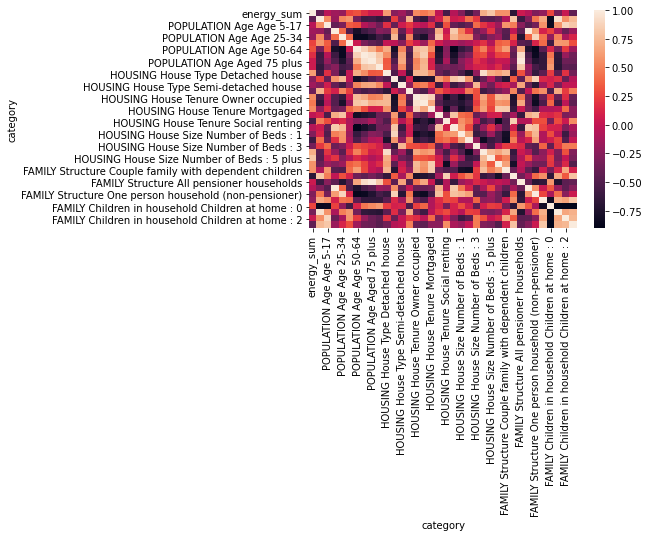

In [17]:
sns.heatmap(correlation)

In [18]:
ind_variables = correlation.loc["energy_sum"]
ind_variables = ind_variables.sort_values(ascending=False)
ind_variables

category
energy_sum                                                     1.000000
HOUSING House Size Number of Beds : 5 plus                     0.808599
HOUSING House Size Number of Beds : 4                          0.701946
HOUSING House Type Detached house                              0.616175
FAMILY Structure Couple family no children                     0.573346
FAMILY Structure Couple family with dependent children         0.571223
HOUSING House Tenure Owner occupied                            0.539319
HOUSING House Tenure Mortgaged                                 0.534595
HOUSING House Tenure Owned outright                            0.460504
POPULATION Age Age 50-64                                       0.304619
FAMILY Children in household Children at home : 0              0.258588
POPULATION Age Age 35-49                                       0.257616
POPULATION Age Aged 65-74                                      0.168824
POPULATION Age Aged 75 plus                            